# Rain prediction in Australia


<img src="../images/1786.webp" height=500 width=700>

In [230]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


import os



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
def print_results(clf, X_val, y_val):
    y_pred = clf.predict(X_val)
    print(confusion_matrix(y_val,y_pred), ": is the confustion matrix")
    print(accuracy_score(y_val,y_pred), ": is the accuracy score")
    print(precision_score(y_val,y_pred), ": is the precision score")
    print(recall_score(y_val,y_pred), ": is the recall score")
    print(f1_score(y_val,y_pred), ": is the f1 score")


In [159]:
def change_yes_no(val):
    if val == 'No':
        return 0
    else:
        return 1

In [130]:
def create_month(df):
    df['Month'] = df.Date.apply(lambda x : int(x.split('-')[1]))
    df.drop('Date', axis=1, inplace=True)

In [227]:
def fill_missing_values(data, saved_mean):
    cols = [cl for cl in data.columns if data[cl].dtype in ['float64']]
    for location in data.Location.unique():
        print("Workin on Location: ", location)
        for month in data.Month.unique():
            for column in cols:
                idx = list(data[(data.Location == location) 
                         & (data.Month == month) 
                         & (data[column].isna())].index)
                fill_value = saved_mean[(saved_mean.Location==location)
                                        & (saved_mean.Month == month)][column]
                #print("Column",column,"Month: ", month, "fill_value ", fill_value )
                data.loc[idx,column] = float(fill_value)
#    return data

In [222]:
import warnings
warnings.filterwarnings('ignore')

# 1. Load data

In [237]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [238]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

***
# Split the data to set a test dataset aside  
***

In [240]:
new_df = df.sample(frac=0.2, random_state=0)
X = new_df.drop('RainTomorrow',axis=1)
y = new_df.RainTomorrow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # split the data into train/test datasets

***
# End of Splitting Data
***

In [162]:
corr_matrix = X.corr()# Check Correlations
print(corr_matrix)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.735862  0.100236     0.476039  0.079612   
MaxTemp        0.735862  1.000000 -0.081235     0.603987  0.477968   
Rainfall       0.100236 -0.081235  1.000000    -0.077331 -0.221439   
Evaporation    0.476039  0.603987 -0.077331     1.000000  0.366874   
Sunshine       0.079612  0.477968 -0.221439     0.366874  1.000000   
WindGustSpeed  0.182033  0.072921  0.131936     0.201548 -0.028057   
WindSpeed9am   0.171901  0.018542  0.082289     0.202575  0.010583   
WindSpeed3pm   0.166456  0.047434  0.054345     0.117723  0.054669   
Humidity9am   -0.241734 -0.516778  0.227973    -0.522883 -0.499404   
Humidity3pm   -0.001779 -0.517297  0.256004    -0.406764 -0.633516   
Pressure9am   -0.460743 -0.342878 -0.159979    -0.277421  0.027432   
Pressure3pm   -0.472269 -0.438826 -0.115244    -0.302317 -0.032574   
Cloud9am       0.079025 -0.285733  0.193917    -0.180101 -0.668166   
Cloud3pm       0.014

***
# Prepare Data 
***

In [163]:
weather_today = X_train.copy()
rain_tomorrow  = y_train.copy()

In [164]:
weather_today['Month'] = weather_today.Date.apply(lambda x : int(x.split('-')[1]))
weather_today.drop('Date',axis=1, inplace=True)
weather_today.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
130249       Hobart     10.7     18.1       0.0          2.0       3.9   
58141      Ballarat      2.4     10.6       0.2          NaN       NaN   
39911   Williamtown     17.1     35.4       0.0          5.4      12.1   
50062   Tuggeranong      6.9     29.3       0.0          NaN       NaN   
120645        Perth      3.2     20.4       0.0          1.4       6.9   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
130249          NW           89.0        NNW        NNW  ...         48.0   
58141          WNW           39.0          N        WNW  ...        100.0   
39911          WNW           31.0         NW          W  ...         81.0   
50062           NW           33.0        WSW        NNW  ...         80.0   
120645         NNW           24.0         NE          N  ...         58.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
130249         58.0        993.6        987.1       7.0       7.0     17.3   
58141          84.0       1017.5       1015.8       6.0       8.0      5.1   
39911          37.0       1018.5       1014.8       2.0       3.0     23.9   
50062          23.0       1018.2       1012.8       NaN       NaN     13.1   
120645         42.0       1023.9       1021.1       6.0       5.0     10.2   

        Temp3pm  RainToday  Month  
130249     14.4         No      8  
58141       9.9         No      6  
39911      34.8         No      1  
50062      29.2         No     11  
120645     19.3         No      7  

[5 rows x 22 columns]

In [165]:
"""
weather_today.RainTomorrow.value_counts() 
weather_No = weather_today[weather_today.RainTomorrow=='No'].sample(frac=1,random_state=0)
weather_Yes = weather_today[weather_today.RainTomorrow=='Yes']
print("Yes shape =",weather_Yes.shape)
weather_Yes.head()
weather_No = weather_No.iloc[:weather_Yes.shape[0],:]
weather_No.shape
weather_balanced = pd.concat([weather_No, weather_Yes])
weather_balanced.shape
weather_today = weather_balanced
weather_today = weather_today.sample(frac=1,random_state=0)
weather_today.head()
"""

'\nweather_today.RainTomorrow.value_counts() \nweather_No = weather_today[weather_today.RainTomorrow==\'No\'].sample(frac=1,random_state=0)\nweather_Yes = weather_today[weather_today.RainTomorrow==\'Yes\']\nprint("Yes shape =",weather_Yes.shape)\nweather_Yes.head()\nweather_No = weather_No.iloc[:weather_Yes.shape[0],:]\nweather_No.shape\nweather_balanced = pd.concat([weather_No, weather_Yes])\nweather_balanced.shape\nweather_today = weather_balanced\nweather_today = weather_today.sample(frac=1,random_state=0)\nweather_today.head()\n'

In [166]:
#rain_tomorrow  = y.copy()
#weather_today = X.copy()
#weather_today.head()


In [167]:
zeros_cnt = weather_today.isnull().sum().sort_values(ascending=False)
percent_zeros = ( weather_today.isnull().sum() /  weather_today.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([zeros_cnt, percent_zeros], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Sunshine        9789  0.480701
Evaporation     8745  0.429434
Cloud3pm        8303  0.407729
Cloud9am        7819  0.383962
Pressure9am     2105  0.103369
Pressure3pm     2101  0.103172
WindDir9am      1467  0.072039
WindGustDir     1449  0.071155
WindGustSpeed   1442  0.070811
Humidity3pm      632  0.031035
WindDir3pm       613  0.030102
Temp3pm          527  0.025879
Rainfall         452  0.022196
RainToday        452  0.022196
WindSpeed3pm     437  0.021459
Humidity9am      333  0.016352
WindSpeed9am     243  0.011933
Temp9am          231  0.011344
MinTemp          204  0.010018
MaxTemp          168  0.008250
Month              0  0.000000
Location           0  0.000000

In [169]:
save = []
cols = [cl for cl in weather_today.columns if weather_today[cl].dtype in ['float64']]
for location in weather_today.Location.unique():
#for column in ['Evaporation']:
    print(f"Working on Location: {location}")
    for month in weather_today.Month.unique():
        save_info = [location]
        for column in cols:
            mean_for_month = weather_today[(weather_today.Location == location) 
                                           & (weather_today.Month == month)][column].mean()
            if np.isnan(mean_for_month):
                #idx = weather_today[(weather_today.Location == location) & (weather_today.Month == month)][column].index
                #weather_today.drop(idx,axis=0,inplace=True)

                mean_for_month = weather_today[(weather_today.Month == month)][column].mean()
            idx = list(weather_today[(weather_today.Location == location)
                                     & (weather_today.Month == month)
                                     & (weather_today[column].isna())].index)
            weather_today.loc[idx,column] = mean_for_month
            save_info.append(mean_for_month)
        save_info.append(month)
        save.append(save_info)
        #print(save_info,list(save_mean.keys()))
        #pd.concat(save_mean,pd.DataFrame(save_info))
weather_today.head()

Working on Location: Hobart
Working on Location: Ballarat
Working on Location: Williamtown
Working on Location: Tuggeranong
Working on Location: Perth
Working on Location: Launceston
Working on Location: Moree
Working on Location: Dartmoor
Working on Location: Woomera
Working on Location: Melbourne
Working on Location: PerthAirport
Working on Location: Albury
Working on Location: Portland
Working on Location: Penrith
Working on Location: Brisbane
Working on Location: Nuriootpa
Working on Location: Sydney
Working on Location: WaggaWagga
Working on Location: Richmond
Working on Location: MountGambier
Working on Location: PearceRAAF
Working on Location: BadgerysCreek
Working on Location: Cobar
Working on Location: Mildura
Working on Location: MountGinini
Working on Location: Canberra
Working on Location: NorahHead
Working on Location: Cairns
Working on Location: Walpole
Working on Location: GoldCoast
Working on Location: Townsville
Working on Location: Uluru
Working on Location: CoffsHarb

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
130249       Hobart     10.7     18.1       0.0     2.000000   3.900000   
58141      Ballarat      2.4     10.6       0.2     2.490000   5.706985   
39911   Williamtown     17.1     35.4       0.0     5.400000  12.100000   
50062   Tuggeranong      6.9     29.3       0.0     7.398795   8.472281   
120645        Perth      3.2     20.4       0.0     1.400000   6.900000   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
130249          NW           89.0        NNW        NNW  ...         48.0   
58141          WNW           39.0          N        WNW  ...        100.0   
39911          WNW           31.0         NW          W  ...         81.0   
50062           NW           33.0        WSW        NNW  ...         80.0   
120645         NNW           24.0         NE          N  ...         58.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
130249         58.0        993.6        987.1  7.000000  7.000000     17.3   
58141          84.0       1017.5       1015.8  6.000000  8.000000      5.1   
39911          37.0       1018.5       1014.8  2.000000  3.000000     23.9   
50062          23.0       1018.2       1012.8  4.744311  4.707932     13.1   
120645         42.0       1023.9       1021.1  6.000000  5.000000     10.2   

        Temp3pm  RainToday  Month  
130249     14.4         No      8  
58141       9.9         No      6  
39911      34.8         No      1  
50062      29.2         No     11  
120645     19.3         No      7  

[5 rows x 22 columns]

In [200]:
saved_mean = pd.DataFrame(save,columns=['Location']+cols+ ['Month'])
saved_mean.head()

Location    MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Hobart   5.375862  13.755172  2.296552     2.006897  5.620690   
1   Hobart   6.296000  13.744000  1.072000     1.560000  4.516000   
2   Hobart  12.878723  23.597872  0.668085     6.744681  7.844681   
3   Hobart  10.819444  18.836111  1.222222     4.988889  7.811111   
4   Hobart   5.075676  12.983784  0.659459     1.502703  4.762162   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0      53.068966     19.689655     22.793103    69.103448    52.620690   
1      47.720000     17.840000     18.240000    70.840000    55.720000   
2      50.595745     16.595745     21.127660    59.170213    48.936170   
3      52.055556     18.250000     19.666667    57.055556    50.555556   
4      49.216216     16.702703     15.972973    73.513514    58.729730   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  Month  
0  1011.465517  1009.568966  4.545455  5.272727   8.727586  12.058621      8  
1  1013.676000  1012.312000  5.333333  5.714286   9.404000  12.604000      6  
2  1011.908511  1010.023404  4.625000  4.750000  16.912766  20.840426      1  
3  1011.955556  1011.175000  5.440000  5.200000  14.219444  16.858333     11  
4  1014.821622  1013.575676  4.880000  5.160000   7.964865  11.748649      7

In [171]:
zeros_cnt = weather_today.isnull().sum().sort_values(ascending=False)
percent_zeros = ( weather_today.isnull().sum() /  weather_today.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([zeros_cnt, percent_zeros], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
WindDir9am      1467  0.072039
WindGustDir     1449  0.071155
WindDir3pm       613  0.030102
RainToday        452  0.022196
Month              0  0.000000
MinTemp            0  0.000000
MaxTemp            0  0.000000
Rainfall           0  0.000000
Evaporation        0  0.000000
Sunshine           0  0.000000
WindGustSpeed      0  0.000000
WindSpeed9am       0  0.000000
WindSpeed3pm       0  0.000000
Humidity9am        0  0.000000
Humidity3pm        0  0.000000
Pressure9am        0  0.000000
Pressure3pm        0  0.000000
Cloud9am           0  0.000000
Cloud3pm           0  0.000000
Temp9am            0  0.000000
Temp3pm            0  0.000000
Location           0  0.000000

**Check how balanced the data is for the target column**

**Now we will deal with the null values**

# 2. Data preprocessing

**A pairplot helps visualize dependencies and correlation between features. Some of them have quite obvious links.**

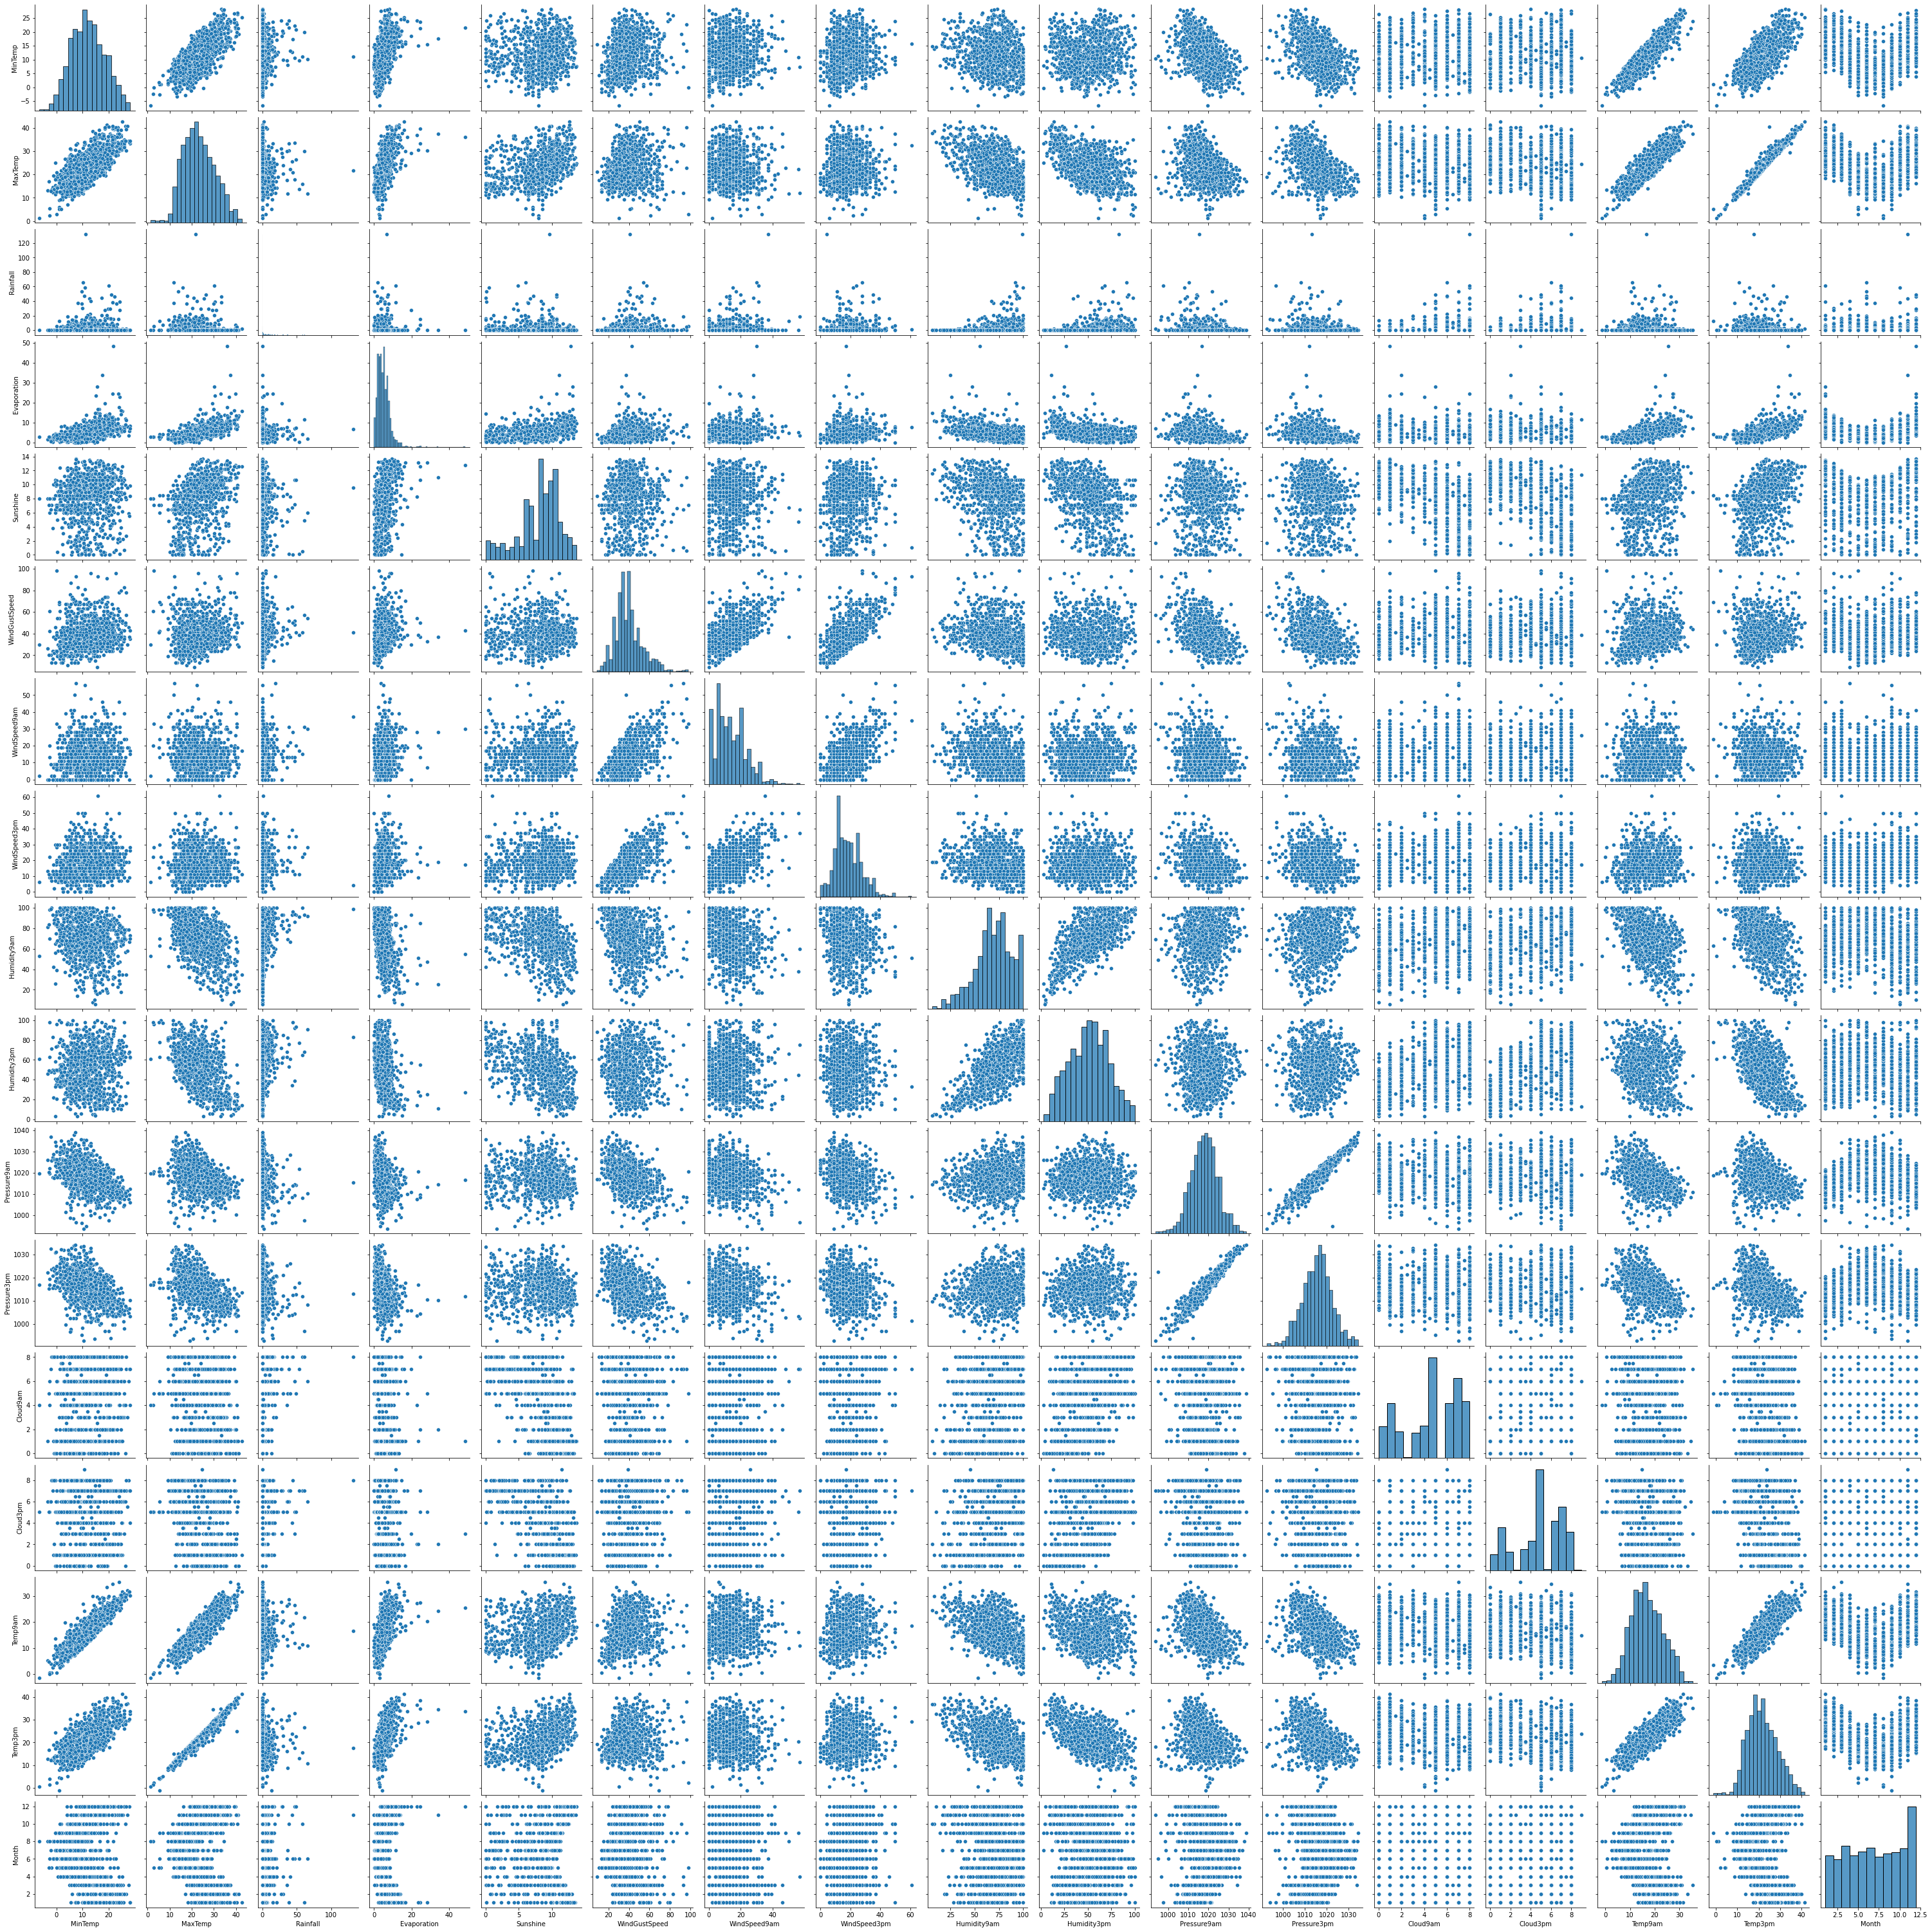

In [75]:
sns.pairplot(weather_today[:1000])

**Comments on the pairplots: There are few linear relations with high values of the r pearson coefficient.**

***
**Take the month out of the Date and move it to its own cell**

In [172]:
num_columns = [column for column in weather_today.columns if weather_today[column].dtype == 'float64']
print(num_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [173]:

num_pipline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [174]:
weather_today[num_columns] = num_pipline.fit_transform(weather_today[num_columns])
weather_today.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
130249       Hobart -0.235304 -0.730005 -0.284885    -0.993630 -1.321291   
58141      Ballarat -1.534894 -1.780880 -0.260299    -0.853193 -0.687613   
39911   Williamtown  0.766790  1.694012 -0.284885    -0.019173  1.554305   
50062   Tuggeranong -0.830297  0.839301 -0.284885     0.553692  0.282128   
120645        Perth -1.409632 -0.407737 -0.284885    -1.165593 -0.269244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
130249          NW       3.720641        NNW        NNW  ...    -1.088155   
58141          WNW      -0.076558          N        WNW  ...     1.637055   
39911          WNW      -0.684110         NW          W  ...     0.641305   
50062           NW      -0.532222        WSW        NNW  ...     0.588897   
120645         NNW      -1.215718         NE          N  ...    -0.564076   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
130249     0.319815    -3.531865    -4.176456  1.051187  1.120848  0.046459   
58141      1.569354    -0.021176     0.081881  0.622826  1.582940 -1.832982   
39911     -0.689428     0.125715    -0.066493 -1.090619 -0.727520  1.063206   
50062     -1.362257     0.081648    -0.363242  0.084937  0.061702 -0.600561   
120645    -0.449132     0.918925     0.868263  0.622826  0.196664 -1.047314   

         Temp3pm  RainToday  Month  
130249 -1.056815         No      8  
58141  -1.698965         No      6  
39911   1.854262         No      1  
50062   1.055143         No     11  
120645 -0.357586         No      7  

[5 rows x 22 columns]

**Let's encode categorical features using one-hot-encoding.**

In [175]:
ohe = pd.get_dummies(data=weather_today, columns=['WindGustDir','WindDir9am','WindDir3pm','Location'],drop_first=True)
ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20364 entries, 130249 to 112877
Columns: 111 entries, MinTemp to Location_Woomera
dtypes: float64(16), int64(1), object(1), uint8(93)
memory usage: 5.4+ MB


In [176]:
from sklearn import preprocessing
from numpy import array

ohe['RainToday'] = weather_today['RainToday'].astype(str)
ohe['RainTomorrow'] =rain_tomorrow.astype(str)

lb = preprocessing.LabelBinarizer()

ohe['RainToday'] = lb.fit_transform(ohe['RainToday'])
ohe['RainTomorrow'] = lb.fit_transform(ohe['RainTomorrow'])

**Drop missing values and create target column y and data X**

In [177]:
ohe = ohe.dropna()
#ohe.drop('Location', axis=1, inplace=True)
y = ohe['RainTomorrow']
X = ohe.drop(['RainTomorrow'], axis=1)

In [178]:
X.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
130249 -0.235304 -0.730005 -0.284885    -0.993630 -1.321291       3.720641   
58141  -1.534894 -1.780880 -0.260299    -0.853193 -0.687613      -0.076558   
39911   0.766790  1.694012 -0.284885    -0.019173  1.554305      -0.684110   
50062  -0.830297  0.839301 -0.284885     0.553692  0.282128      -0.532222   
120645 -1.409632 -0.407737 -0.284885    -1.165593 -0.269244      -1.215718   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
130249      2.133299      1.310461    -1.088155     0.319815  ...   
58141       0.558809      1.082243     1.637055     1.569354  ...   
39911       0.108955     -0.857609     0.641305    -0.689428  ...   
50062      -1.353070     -0.172956     0.588897    -1.362257  ...   
120645     -0.565826     -0.629391    -0.564076    -0.449132  ...   

        Location_Townsville  Location_Tuggeranong  Location_Uluru  \
130249                    0                     0               0   
58141                     0                     0               0   
39911                     0                     0               0   
50062                     0                     1               0   
120645                    0                     0               0   

        Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
130249                    0                 0                  0   
58141                     0                 0                  0   
39911                     0                 0                  0   
50062                     0                 0                  0   
120645                    0                 0                  0   

        Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
130249                     0                     0                    0   
58141                      0                     0                    0   
39911                      1                     0                    0   
50062                      0                     0                    0   
120645                     0                     0                    0   

        Location_Woomera  
130249                 0  
58141                  0  
39911                  0  
50062                  0  
120645                 0  

[5 rows x 111 columns]

In [179]:
y.head()

130249    0
58141     0
39911     1
50062     1
120645    0
Name: RainTomorrow, dtype: int64

# 3. Model building

In [181]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.3,random_state=0) 
allValues = (X_train,X_val,y_train,y_val)

In [182]:
def assessClassifier(clf,allValues):
    name = str(clf)
    X_train,X_test,y_train,y_test = allValues
    pipe = Pipeline([('scaler', StandardScaler()), (name, clf)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    roc_auc_sc = roc_auc_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    return {'name':name,'f1':f1, 'precision':precision,'recall':recall,'roc_auc_score':roc_auc_sc,'accuracy':accuracy}

In [183]:
clf_Logistic = LogisticRegression()
#clf_Forest = RandomForestClassifier()
#clf_KNN = KNeighborsClassifier()
#clf_SVC = SVC()
#clf_XGBoost = XGBClassifier()
#clf_NaiveB = GaussianNB()

In [185]:
details = {'name':[],'f1':[],'precision':[],'recall':[],'roc_auc_score':[], 'accuracy':[]}
for clf in [clf_Logistic]:#, clf_Forest], clf_KNN,clf_SVC, clf_XGBoost, clf_NaiveB]:
    print(f"Working on {str(clf)}")
    results = assessClassifier(clf, allValues)
    for item in results.keys():
        details[item].append(results[item])

Working on LogisticRegression()


In [186]:
df = pd.DataFrame(details)
df

name        f1  precision    recall  roc_auc_score  \
0  LogisticRegression()  0.895003   0.853913  0.940247       0.720962   

   accuracy  
0  0.833224

***
#  Comments on Vanilla Classifiers 
### I will use RandomForestClassifier, SVC, and XGBClassifier Classifiers for tune ups and comparison
***

***
# Tune up Logistic Regression
***

In [187]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
grid_search_LogReg = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='precision',
                                return_train_score=True, verbose=1, n_jobs=-1)

In [188]:
grid_search_LogReg.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   23.1s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             return_train_score=True, scoring='precision', verbose=1)

In [189]:
print_results(grid_search_LogReg,X_train,y_train)

[[ 1801  1623]
 [  672 10158]] : is the confustion matrix
0.8389925634909499 : is the accuracy score
0.862235803412274 : is the precision score
0.9379501385041551 : is the recall score
0.8985007297333156 : is the f1 score


In [190]:
print_results(grid_search_LogReg,X_val,y_val)

[[ 747  744]
 [ 279 4340]] : is the confustion matrix
0.832569558101473 : is the accuracy score
0.8536585365853658 : is the precision score
0.9395973154362416 : is the recall score
0.8945686900958466 : is the f1 score


In [241]:
X_test.head()

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
132047  2014-10-16            Hobart      9.6     13.4       0.6          5.4   
66625   2015-11-29  MelbourneAirport     11.6     21.2       0.0          6.8   
6002    2017-05-10     BadgerysCreek      6.8     21.3       0.0          NaN   
2464    2015-11-28            Albury      8.1     28.3       0.0          NaN   
80454   2015-12-30          Watsonia     11.3     37.0       0.0          7.0   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  \
132047       3.6         SSW           57.0          S  ...         17.0   
66625        4.8           S           35.0        SSW  ...         24.0   
6002         NaN         WSW           17.0         SW  ...          6.0   
2464         NaN           W           30.0          E  ...          7.0   
80454       12.4          SE           30.0         NE  ...          9.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
132047         87.0         47.0       1012.8       1017.1       6.0   
66625          62.0         47.0       1014.8       1013.0       7.0   
6002           76.0         45.0       1025.5       1021.9       NaN   
2464           57.0         25.0       1017.3       1012.7       NaN   
80454          64.0         15.0       1017.0       1013.3       1.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
132047       7.0     10.0     12.0         No  
66625        7.0     15.7     19.2         No  
6002         NaN     14.2     20.0         No  
2464         NaN     16.5     26.7         No  
80454        7.0     19.4     35.0         No  

[5 rows x 22 columns]

In [242]:
#print_results(grid_search_LogReg,X_test,y_test)
create_month(X_test)

In [243]:
fill_missing_values(X_test, saved_mean)

Workin on Location:  Hobart
Workin on Location:  MelbourneAirport
Workin on Location:  BadgerysCreek
Workin on Location:  Albury
Workin on Location:  Watsonia
Workin on Location:  Woomera
Workin on Location:  NorahHead
Workin on Location:  Launceston
Workin on Location:  Melbourne
Workin on Location:  Sydney
Workin on Location:  Albany
Workin on Location:  Richmond
Workin on Location:  Cobar
Workin on Location:  PerthAirport
Workin on Location:  Portland
Workin on Location:  CoffsHarbour
Workin on Location:  Brisbane
Workin on Location:  Newcastle
Workin on Location:  MountGinini
Workin on Location:  Ballarat
Workin on Location:  Penrith
Workin on Location:  Darwin
Workin on Location:  WaggaWagga
Workin on Location:  Moree
Workin on Location:  Townsville
Workin on Location:  GoldCoast
Workin on Location:  Perth
Workin on Location:  Walpole
Workin on Location:  Dartmoor
Workin on Location:  Canberra
Workin on Location:  PearceRAAF
Workin on Location:  Nuriootpa
Workin on Location:  Cair

In [249]:
ohe = pd.get_dummies(data=X_test, columns=['WindGustDir','WindDir9am','WindDir3pm','Location'],drop_first=True)

In [255]:
ohe['RainToday'] = X_test['RainToday'].astype(str)
ohe['RainTomorrow'] =y_test.astype(str)

lb = preprocessing.LabelBinarizer()

ohe['RainToday'] = lb.fit_transform(ohe['RainToday'])
ohe['RainTomorrow'] = lb.fit_transform(ohe['RainTomorrow'])

In [256]:
ohe = ohe.dropna()
#ohe.drop('Location', axis=1, inplace=True)
test_y = ohe['RainTomorrow']
test_X = ohe.drop(['RainTomorrow'], axis=1)

132047    1
66625     1
6002      1
2464      1
80454     1
         ..
125465    1
118576    1
128170    0
53129     0
84250     1
Name: RainTomorrow, Length: 8728, dtype: int64

In [245]:
print(num_columns)
X_test[num_columns] = num_pipline.fit_transform(X_test[num_columns])
X_test[num_columns]

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
132047 -0.408350 -1.382179 -0.211496    -0.016910 -1.396916       1.307603   
66625  -0.094430 -0.279913 -0.285574     0.363590 -0.983965      -0.378500   
6002   -0.847839 -0.265781 -0.285574    -0.581674 -0.436979      -1.758039   
2464   -0.643791  0.723432 -0.285574     0.534102  0.284692      -0.761705   
80454  -0.141518  1.952883 -0.285574     0.417948  1.631392      -0.761705   
...          ...       ...       ...          ...       ...            ...   
125465 -1.507072  0.469063 -0.285574    -0.120013 -0.020965       0.311269   
118576 -0.769359 -0.477755 -0.285574    -1.049696  0.530189       0.234628   
128170 -0.047342 -0.732124  0.103011     0.293819  0.367280       1.920731   
53129  -1.522768 -1.113678 -0.260882     0.817638  0.556917      -0.225218   
84250   1.224036  1.500671 -0.285574     0.363590  0.530189      -1.374834   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
132047      0.680744     -0.180617     0.953111    -0.220581    -0.724209   
66625      -0.109228      0.623799    -0.352012    -0.220581    -0.429030   
6002       -0.334935     -1.444699     0.378857    -0.317163     1.150174   
2464       -0.560641     -1.329782    -0.613037    -1.282978    -0.060057   
80454      -0.786348     -1.099949    -0.247602    -1.765886    -0.104334   
...              ...           ...          ...          ...          ...   
125465     -0.786348      0.623799    -0.665241    -1.669305     0.051836   
118576     -0.899201      0.853633     0.483267    -0.123999     1.474870   
128170      0.680744     -0.180617     1.057521     1.228143    -0.975110   
53129       0.342185     -0.640283     1.005316     0.552072    -0.646615   
84250      -0.899201     -1.099949    -0.299807     0.069164    -0.930833   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
132047     0.262710  0.610593  1.111659 -1.075391 -1.399058  
66625     -0.345919  1.036044  1.111659 -0.197610 -0.358954  
6002       0.975252 -0.000404  0.103553 -0.428605 -0.243387  
2464      -0.390453  0.539684  0.706951 -0.074413  0.724488  
80454     -0.301385 -1.516664  1.111659  0.372177  1.923497  
...             ...       ...       ...       ...       ...  
125465    -0.004920 -0.078559 -0.040778 -0.136011  0.608921  
118576     1.672949 -0.240310  0.186612 -0.397806 -0.358954  
128170    -0.316230 -0.146925 -0.209652 -0.367006 -0.864560  
53129     -0.629529  0.003448 -0.067117 -1.460382 -1.326829  
84250     -1.073306 -1.942115  1.111659  1.604150  1.446783  

[8728 rows x 16 columns]

In [252]:
print_results(grid_search_LogReg, test_X, test_y)

TypeError: float() argument must be a string or a number, not 'LabelBinarizer'

***
# Tune up Random Forest
***

In [ ]:
param_grid = [
    {'n_estimators':[3,10,30,50,], 'max_features':[2,4,6,8]},
   # {'n_estimators': [50, 60, 70,80,90,100,110],
    #'max_features': ['auto'],
    #'max_depth' : [5,10,20, 30, 40, 50 ,60 , 70],
    #'criterion' :['gini', 'entropy']},
    #{'bootstrap':[True],'n_estimators':[3,5,10,20],'max_features':['auto']},
]

In [ ]:
grid_search_RandomForest = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='precision',
                            return_train_score=True, verbose=1, n_jobs = -1)

In [ ]:
grid_search_RandomForest.fit(X_train,y_train)

In [ ]:
print(grid_search_RandomForest.best_params_)

In [ ]:
print_results(grid_search_RandomForest,X_train,y_train)

In [ ]:
print_results(grid_search_RandomForest, X_val,y_val)

In [ ]:
print_results(grid_search_RandomForest,X_test,y_test)

***
# Tune up SVC
***

In [ ]:
Cs = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000]
#Cs = [0.001, 0.1 ,1, 100, 10000]
gammas = [0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 200, 300, 1000]
#gammas = [ 1,2,7,8,9,10,11,12,13]
param_grid = {'C':Cs, 'gamma':gammas }

In [ ]:
grid_search_SVC = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=10, scoring='precision',verbose=1,n_jobs=-1)

In [ ]:
grid_search_SVC.fit(X_train[:6000],y_train[:6000])

In [ ]:
print(grid_search_SVC.best_estimator_)

In [ ]:
print_results(grid_search_SVC,X_train,y_train)

In [ ]:
print_results(grid_search_SVC, X_val,y_val)

In [ ]:
print_results(grid_search_LogReg,X_test,y_test)

***
# Tune up NaiveBaeys
***

In [ ]:
param_grid_nb = {
    'var_smoothing':np.logspace(0, -15, num=100)

}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(),param_grid = param_grid_nb, verbose =1, cv=10, n_jobs=-1,scoring='precision')

In [ ]:
nbModel_grid.fit(X_train,y_train)

In [ ]:
print(nbModel_grid.best_estimator_)

In [ ]:
print_results(nbModel_grid, X_train, y_train)

In [ ]:
print_results(nbModel_grid, X_val,y_val)

In [ ]:
print_results(nbModel_grid, X_test, y_test)

***
# HGBoost Tune Up
***

In [ ]:
param_grid_xgb = {
    'max_depth':range(2,10,1),
    'n_estimators': range(60,220,40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid_xgb,
    verbose=1,
    cv=10,
    n_jobs=-1,
    scoring='precision'
)

In [ ]:
grid_search_xgb.fit(X_train[:2000],y_train[:2000])

In [ ]:
print(grid_search_xgb.best_estimator_)

In [ ]:
print_results(grid_search_xgb, X_train,y_train)

In [ ]:
print_results(grid_search_xgb, X_val,y_val)

In [ ]:
print_results(grid_search_xgb, X_test, y_test)